Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


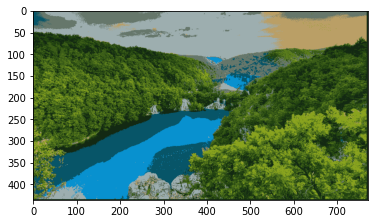

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random


def euclidean_distance(x, y):
  distance = (x[0] - y[0])**2 + (x[1] - y[1])**2 + (x[2] - y[2])**2
  return math.sqrt(distance)

def update_centers(data, labels, centers):
  for k in range(len(centers)):
    sumx = 0
    sumy = 0
    sumz = 0
    count = 0

    for i in range(len(data)):
      if (labels[i] == k):
        sumx += data[i, 0]
        sumy += data[i, 1]
        sumz += data[i, 2]
        count += 1

    if (count == 0):           # in case we try to divide by 0 if no values assigned to cluster
      count = 1

    centers[k,0] = float(sumx / count)   # update cluster centers
    centers[k,1] = float(sumy / count)
    centers[k,2] = float(sumz / count)

  return centers

def kmeans(data, k, max_iterations):
  random.seed()
  n = len(data)
  centers = np.zeros((k, 3))
  for i in range(k):   # pick random points for initial centers
    r = random.randrange(0, n-1, 1)
    centers[i] = data[r]
  labels = np.zeros((len(data), 1), dtype=int) # initial cluster memberships
  # update the clusters until max_iterations is reached
  for iteration in range(max_iterations):
    for a in range(n):
      distances = np.zeros(k)
      for b in range(k):
        distances[b] = euclidean_distance(data[a], centers[b])
      labels[a] = [min(range(len(distances)), key=distances.__getitem__)]
    centers = update_centers(data, labels, centers) 
  return labels, centers


def main():
  image = cv2.imread('/content/gdrive/My Drive/CptS437/HW3/image.png')
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # map onto our color space

  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = image.reshape((-1, 3))   # Here -1 means unknown dimension
  # convert to float
  pixel_values = np.float32(pixel_values)

  # define stopping criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  k = 10
  max_iterations = 5
  labels, (centers) = kmeans(pixel_values, k, max_iterations)

  # uncomment this next line to see opencv kmeans
  #_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # convert back to 8 bit values
  centers = np.uint8(centers)

  # flatten the labels array
  labels = labels.flatten()
  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]

  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image.shape)
  # show the image
  plt.imshow(segmented_image)
  plt.show()


main()